In [3]:
!pip install numpy pandas

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
disease_df = pd.read_csv("framingham.csv")
disease_df.drop(columns=['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)

In [3]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex_male         4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [4]:
disease_df.isnull().sum()

Sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
disease_df.dropna(axis = 0, inplace = True)
disease_df

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [6]:
print(disease_df.TenYearCHD.value_counts())

TenYearCHD
0    3179
1     572
Name: count, dtype: int64


In [7]:
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


C:\conda_temp\ipykernel_27148\2413258200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df,


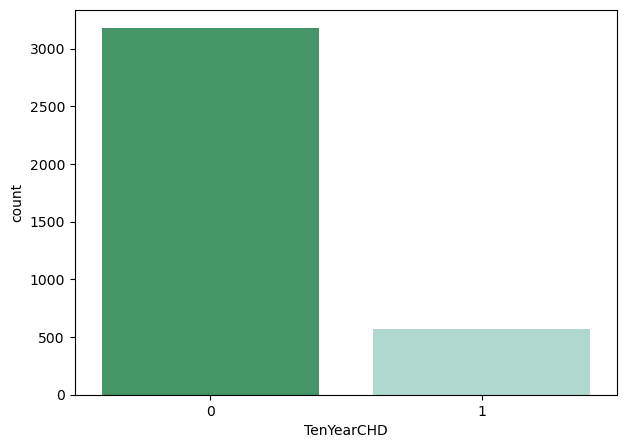

In [8]:
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df,
             palette="BuGn_r")
plt.show()

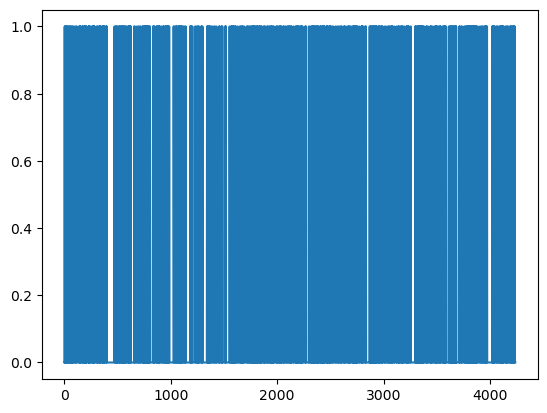

In [9]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

### Fitting Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', 
      accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8490230905861457


The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



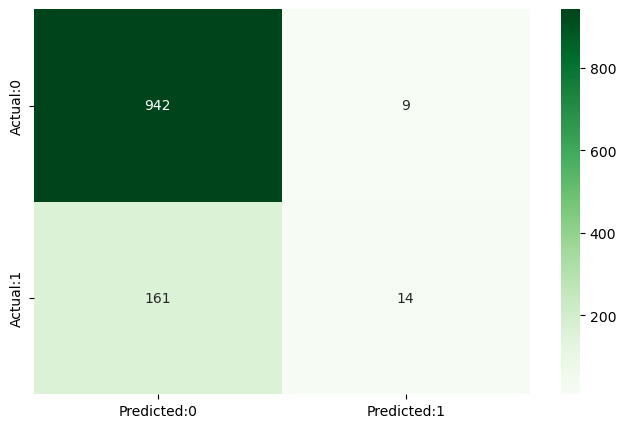

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



In [15]:
LogisticRegression(class_weight='balanced')



LogisticRegression(class_weight='balanced')

In [16]:
RandomForestClassifier(class_weight='balanced')


RandomForestClassifier(class_weight='balanced')

In [17]:
SVC(class_weight='balanced')

SVC(class_weight='balanced')

In [18]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "SVM": SVC(class_weight='balanced'),
    "KNN": KNeighborsClassifier()
}

metrics_dict = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

confusion_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    metrics_dict["Model"].append(name)
    metrics_dict["Accuracy"].append(accuracy_score(y_test, preds))
    metrics_dict["Precision"].append(precision_score(y_test, preds, zero_division=0))
    metrics_dict["Recall"].append(recall_score(y_test, preds, zero_division=0))
    metrics_dict["F1 Score"].append(f1_score(y_test, preds, zero_division=0))

    confusion_matrices[name] = confusion_matrix(y_test, preds)

metrics_df = pd.DataFrame(metrics_dict)
metrics_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.671403,0.281879,0.720000,0.405145
1,Random Forest,0.842806,0.450000,0.051429,0.092308
2,SVM,0.674067,0.274648,0.668571,0.389351
3,KNN,0.830373,0.357143,0.114286,0.173160


In [20]:
metrics_df.to_csv("model_comparison.csv", index=False)
print(" Comparison saved as 'model_comparison.csv'")


 Comparison saved as 'model_comparison.csv'


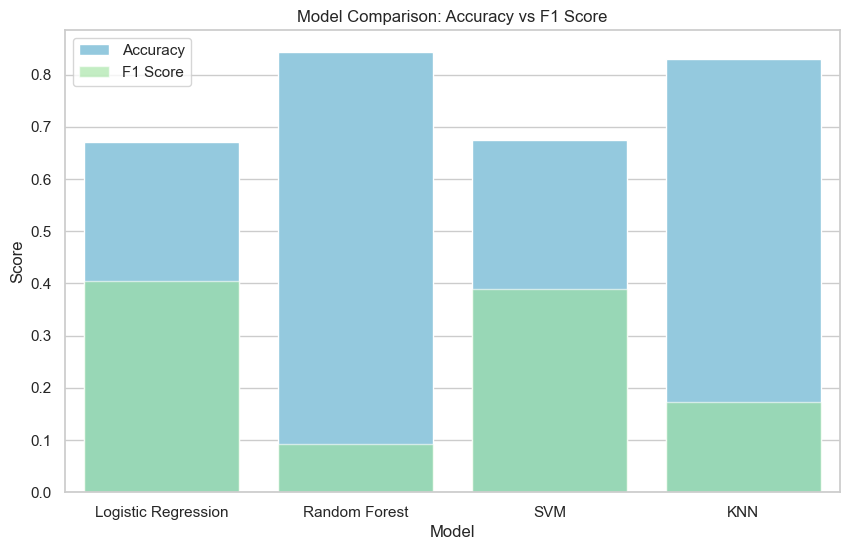

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=metrics_df, color='skyblue', label="Accuracy")
sns.barplot(x="Model", y="F1 Score", data=metrics_df, color='lightgreen', alpha=0.6, label="F1 Score")
plt.title("Model Comparison: Accuracy vs F1 Score")
plt.ylabel("Score")
plt.legend()
plt.show()


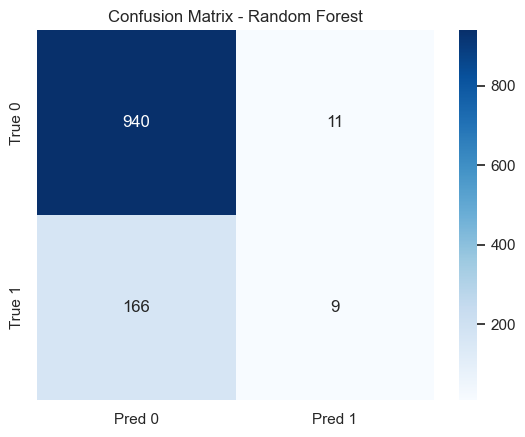

In [ ]:
model_name = "Random Forest" 
cm = confusion_matrices[model_name]
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.title(f"Confusion Matrix - {model_name}")
plt.show()


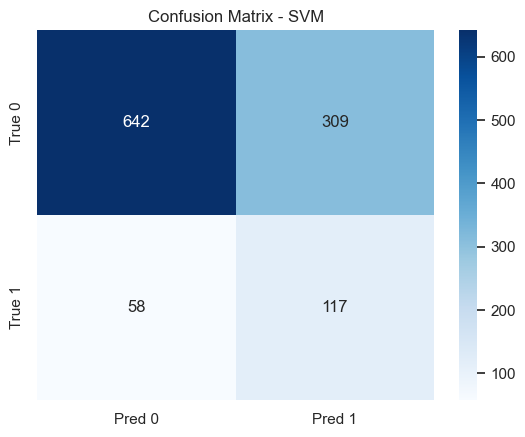

In [23]:
model_name = "SVM"  # or any other
cm = confusion_matrices[model_name]
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.title(f"Confusion Matrix - {model_name}")
plt.show()


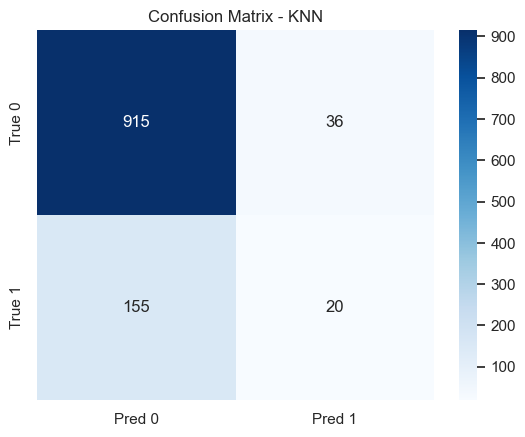

In [24]:
model_name = "KNN"  # or any other
cm = confusion_matrices[model_name]
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.title(f"Confusion Matrix - {model_name}")
plt.show()
